# Linear Regression

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

## Example of Linear Regression

w[0]: 0.393906  b: -0.031804


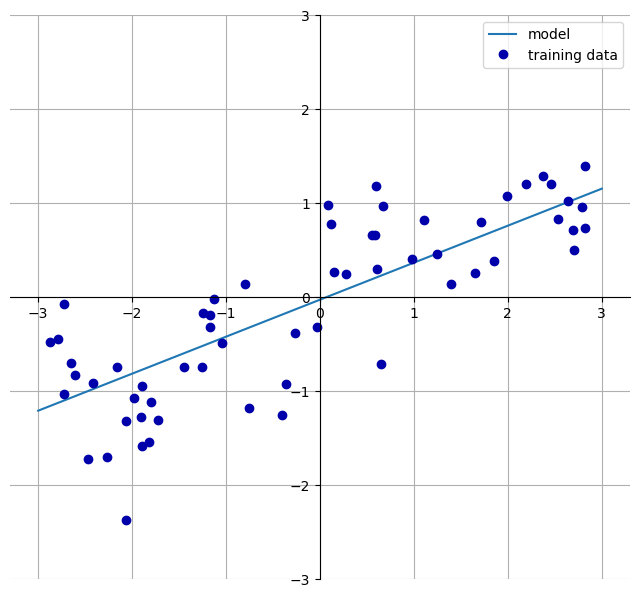

In [39]:
mglearn.plots.plot_linear_regression_wave()

## OLS(Ordinary Least Squares) Method

- OLS is the simplest and most common method to estimate the coefficients of a linear regression model.
- The ordinary least squares (OLS) method seeks to minimize the residual sum of squares (RSS):
$$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)

lr = LinearRegression().fit(X_train, y_train)

(45, 1)


- **coef_** : array, shape (n_features, ) or (n_targets, n_features)
    - Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.
- **intercept_** : float or array of shape (n_targets,)
    - Independent term in the linear model. Set to 0.0 if fit_intercept = False.

In [43]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759704


In [45]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


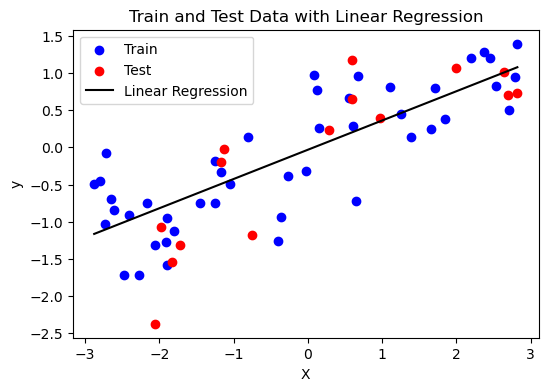

In [56]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_aspect('equal')

ax.scatter(X_train, y_train, color='blue', label='Train')
ax.scatter(X_test, y_test, color='red', label='Test')

X_range = np.linspace(X.min(), X.max(), num=100).reshape(-1, 1)
y_range_pred = lr.predict(X_range)
ax.plot(X_range, y_range_pred, 'k-', label='Linear Regression')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Train and Test Data with Linear Regression')
ax.legend()
plt.show()


### OLS with high-dimensional data

In [58]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Training set score: 0.95
Test set score: 0.61


In [63]:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- With high-dimensional datasets, the OLS method can be easily overfitting.

## Ridge Regression

- Ridge regression addresses some of the problems of OLS by imposing a penalty on the size of the coefficients.
- All coefficients should have be close to zero -> each feature should have as little effect on the outcome as possible.
- **L2 regularization** : the penalty is the squared sum of the coefficients.
- Ridge Regression adds a penalty to this minimization problem:
$$RSS + \alpha \sum_{j=1}^{p} \beta_j^2$$

where:
- $\alpha$ is a parameter we need to choose.
- $\sum_{j=1}^{p} \beta_j^2$ is the squared sum of the coefficients.

if $\alpha = 0$, then it's just OLS.
with high $\alpha$, the coefficients are close to zero.

Ridge regression makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training data.

In [65]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [66]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [67]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


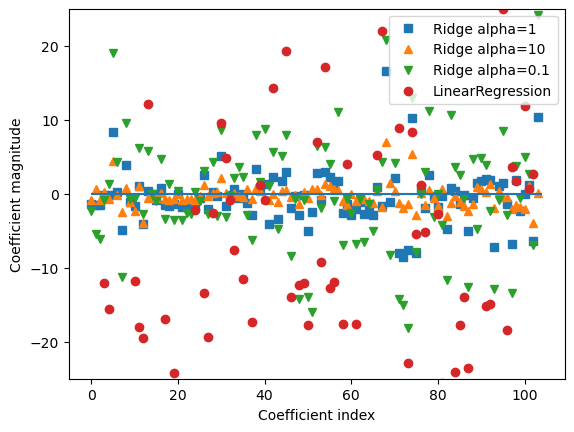

In [68]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

- Complexity of model : 
    - ridge10 < ridge1 < ridge0.1 < OLS

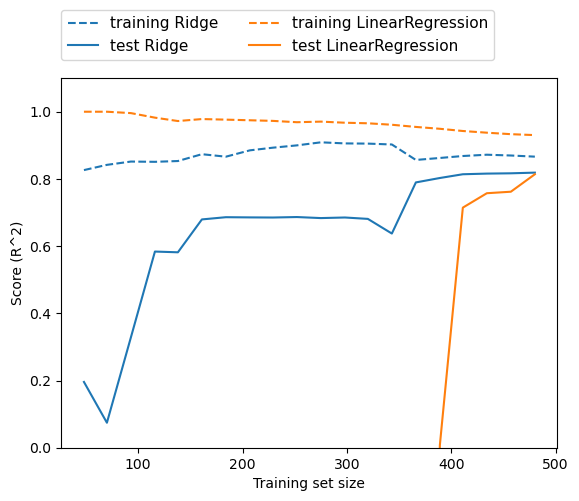

In [69]:
mglearn.plots.plot_ridge_n_samples()

Learning curves for ridge regression and linear regression on the Boston Housing dataset
- The lower the training set size, ridge is better than linear regression.
- As more data becomes available, linear regression quickly catches up with ridge regression.

-> With enough data, regularization becomes less important


## Lasso

- Lasso(Least Absolute Shrinkage and Selection Operator) is another model for regularizing linear regression.
- **L1 regularization** : the penalty is the absolute sum of the coefficients.
- Lasso Regression adds a penalty to this minimization problem:
$$RSS + \alpha \sum_{j=1}^{p} |\beta_j|$$

where:
- $\alpha$ is a parameter we need to choose.
- $\sum_{j=1}^{p} |\beta_j|$ is the absolute sum of the coefficients.

The difference between Lasso and Ridge is that Lasso can completely eliminate the effect of some features(sets some coefficients to zero).

In [70]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [71]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [72]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


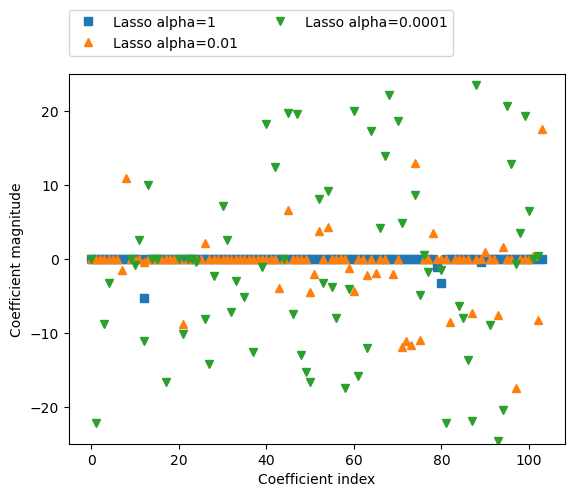

In [77]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

## OLS vs Ridge vs Lasso

- OLS : 
    - No regularization
    - Can overfit
- Ridge :
    - L2 Regularization
    - Can't zero out coefficients
- Lasso :
    - L1 Regularization
    - Can zero out coefficients

In practice, ridge regression is usually the first choice between these two models.
- However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.


## ElasticNet

**ElasticNet** is a compromise between Lasso and Ridge.
- works best in practice
- It adds both the L1 and L2 penalty to the RSS:
$$RSS + \alpha \sum_{j=1}^{p} |\beta_j| + \alpha \sum_{j=1}^{p} \beta_j^2$$

where:
- $\alpha$ is a parameter we need to choose.
- $\sum_{j=1}^{p} |\beta_j|$ is the absolute sum of the coefficients.
- $\sum_{j=1}^{p} \beta_j^2$ is the squared sum of the coefficients.



